##### Lab Exercise: 1

Implementing Multi-Armed Bandit Problem from scratch in python

Multi Armed Bandit problem, chaging it to a function and then using it for the data that we have.




In [11]:
import numpy as np
import matplotlib.pyplot as plt
slot_names = ['Top banner', 'sidebar', 'footer', 'pop-up']
true_slot_values = [0.04,0.02,0.03,0.01]

In [12]:
class MultiArmedBanditEpsilonGreedy:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.probabilities = np.random.rand(n_arms)
        self.estimates = np.zeros(n_arms)
        self.counts = np.zeros(n_arms)

    def pull_arm(self, arm):
        """Simulates pulling an arm. Returns 1 for success, 0 for failure."""
        return 1 if np.random.rand() < true_slot_values[arm] else 0

    def update_estimates(self, arm, reward):
        """Updates the estimated probability of success for the arm based on the reward."""
        self.counts[arm] += 1
        self.estimates[arm] += (reward - self.estimates[arm]) / self.counts[arm]

    def select_epsilon_greedy_arm(self):
        """Selects an arm using the epsilon-greedy strategy."""
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.estimates)


In [13]:
def eg_strategy(bandit, n_rounds):
    total_reward = 0 
    rewards = []
    arm_pulls = np.zeros(bandit.n_arms)

    for _ in range(n_rounds):
        arm = bandit.select_epsilon_greedy_arm()
        reward = bandit.pull_arm(arm)
        bandit.update_estimates(arm, reward)
        total_reward += reward
        rewards.append(total_reward)
        arm_pulls[arm] += 1

    return rewards, arm_pulls

In [14]:
n_arms = 4
n_rounds = 1000

In [15]:
bandit = MultiArmedBanditEpsilonGreedy(n_arms,0.1)

In [16]:
rewards, arm_pulls = eg_strategy(bandit, n_rounds)

In [17]:
len(rewards)

1000

In [18]:
len(arm_pulls)

4

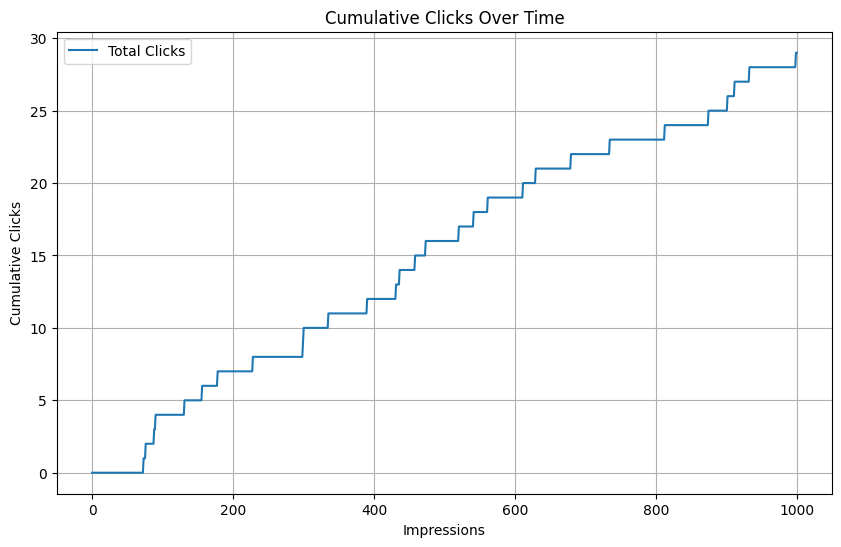

15155


In [34]:
plt.figure(figsize = (10,6))
plt.plot(rewards, label = 'Total Clicks')
plt.xlabel('Impressions')
plt.ylabel('Cumulative Clicks')
plt.title('Cumulative Clicks Over Time')
plt.grid(True)
plt.legend()
plt.show()
print(sum(rewards))


This graph shows how the total number of clicks grows as the algorithm serves more ads.

At the start, the algorithm is still exploring different ad slots (due to the epsilon-greedy strategy), so the rate of clicks might be slower.

Around 300 impressions, you’ll notice the graph starts to rise more steeply. This indicates that the algorithm has learned which ad slot performs best and begins to focus on that slot. As a result, the number of clicks increases more quickly.

When the line gets steeper, it means the algorithm is learning and prioritizing the ad slot that’s generating the most clicks.

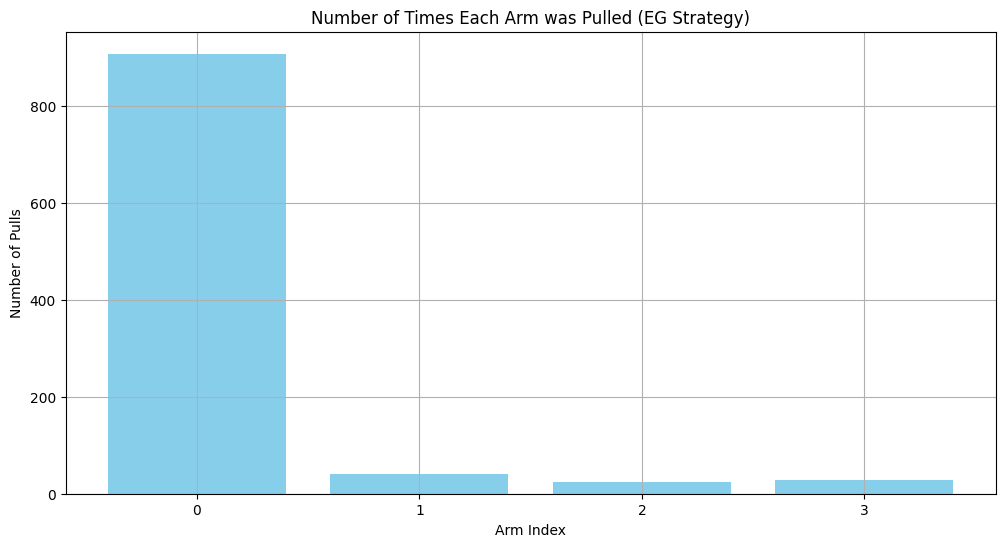

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(range(n_arms), arm_pulls, color='skyblue')
plt.xlabel('Arm Index')
plt.ylabel('Number of Pulls')
plt.title('Number of Times Each Arm was Pulled (EG Strategy)')
plt.xticks(range(n_arms))
plt.grid(True)
plt.show()


In [38]:
print("Total number of impressions:(Above Graph)")
for i in range(4):
    print(f'{slot_names[i]}',arm_pulls[i])


Total number of impressions:(Above Graph)
Top banner 907.0
sidebar 40.0
footer 25.0
pop-up 28.0


Here, we can see that the top banner ad slot was the most effective at generating clicks, with the highest CTR of 0.04. Because of this, the algorithm focused on it more often. The other ad slots had lower CTRs, so after exploring them, the algorithm used them much less.

The top banner was chosen 842 times out of 1000 rounds, while the other ad slots were selected only 29, 101, and 28 times. This shows how the algorithm prioritized the top-performing slot.

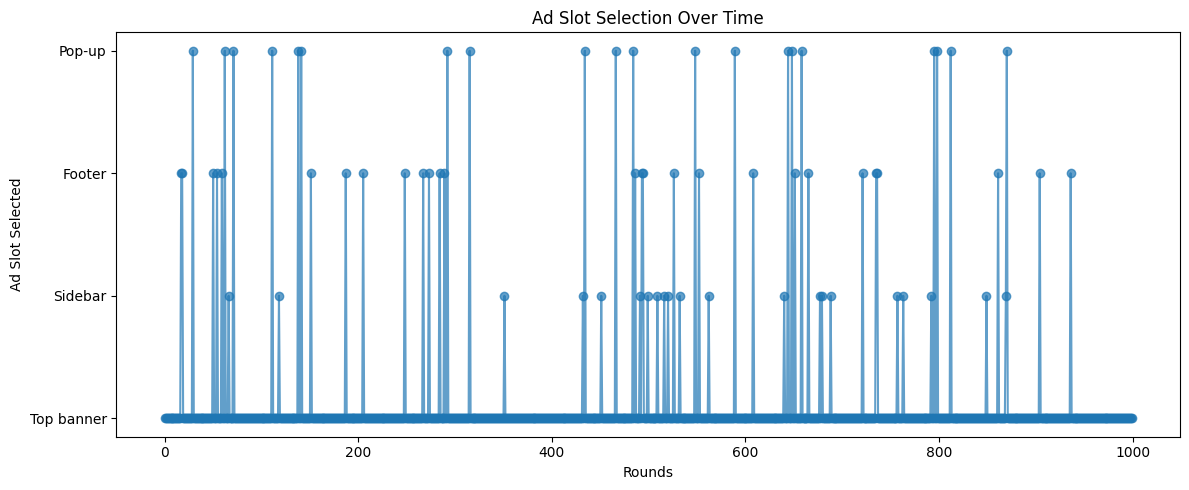

In [42]:
# Plot arm pulls over time (Ad Slot Selection)
plt.figure(figsize=(12,5))
plt.plot(slot_selection, marker='o', linestyle='-', alpha=0.7)
plt.yticks(ticks=np.arange(n_arms), labels=slot_names)
plt.title('Ad Slot Selection Over Time')
plt.xlabel('Rounds')
plt.ylabel('Ad Slot Selected')

plt.tight_layout()
plt.show()


In this graph, we can see that the algorithm mainly focuses on the top banner ad slot because it has the highest click-through rate (CTR). The algorithm learns that the top banner performs the best and chooses it most often.

The sidebar, footer, and pop-up ads were occasionally explored, but they were selected much less frequently compared to the top banner.

If you look at the left side of the graph, you’ll notice more variation—this shows that in the early stages, the algorithm was exploring different ad slots more evenly. Later on, it starts to focus almost entirely on the top banner, as it proved to deliver the most clicks.

The few scattered points on the right indicate that the algorithm still occasionally tried other ad slots, even though their CTR was lower. This is a sign that it was still exploring a bit, just to make sure it wasn’t missing out on any better options.

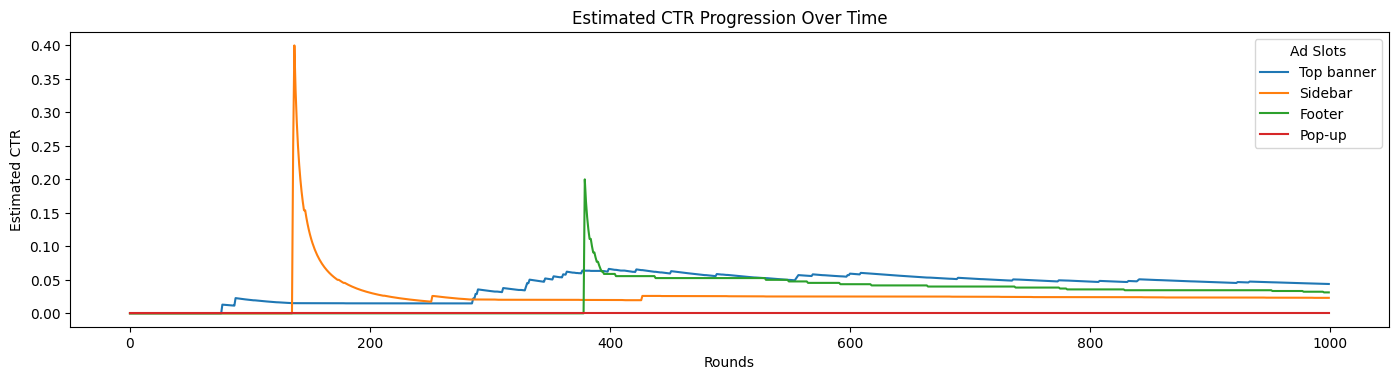

In [50]:
# Plot Cumulative Reward and CTR Progression
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 2)
for arm in range(n_arms):
    plt.plot(estimates_progression[:, arm], label=slot_names[arm])

plt.title('Estimated CTR Progression Over Time')
plt.xlabel('Rounds')
plt.ylabel('Estimated CTR')
plt.legend(title="Ad Slots")
plt.tight_layout()
plt.show()


At the start, there's a noticeable spike in the green line (Footer slot), which suggests it got a click early on, but then quickly dropped off as it stopped receiving clicks.

The blue line (Top banner) steadily rises over time, showing that this slot performed better and consistently got more clicks as more ads were shown.

The orange line (Sidebar) shows a very low click-through rate (CTR), so the algorithm eventually stops focusing on it.

The red line (Pop-up) stays flat with no clicks, likely because people found pop-ups annoying and didn’t interact with them, resulting in zero CTR.